# Brain Cancer Classifier 

#### Data Preparation - EDA

----

### Loading Dataset

We are gonna to use a specific dataset from HuggingFace : "Alwaly/Brain_Cancer-cancer"

In [1]:
# Load Dataset

from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("Alwaly/Brain_Cancer-cancer")

In [2]:
# Type of the dataset and its features
print(type(ds))
print(ds)

<class 'datasets.dataset_dict.DatasetDict'>
DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 15000
    })
})


#### Visualization of sample

- Simple image

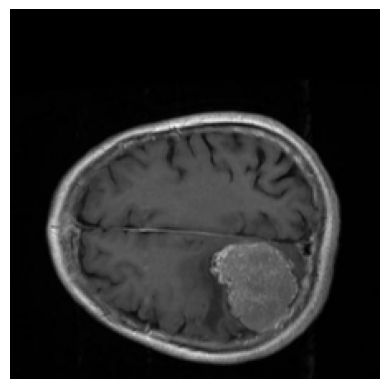

The following image (first of the dataset) characterize a brain_menin


In [3]:
# Visualize the dataset and the first image
import matplotlib.pyplot as plt

ds["train"][0]
plt.imshow(ds["train"][0]["image"])
plt.axis("off")
plt.show()
print(f"The following image (first of the dataset) characterize a {ds["train"][0]["label"]}")

- Multiple samples

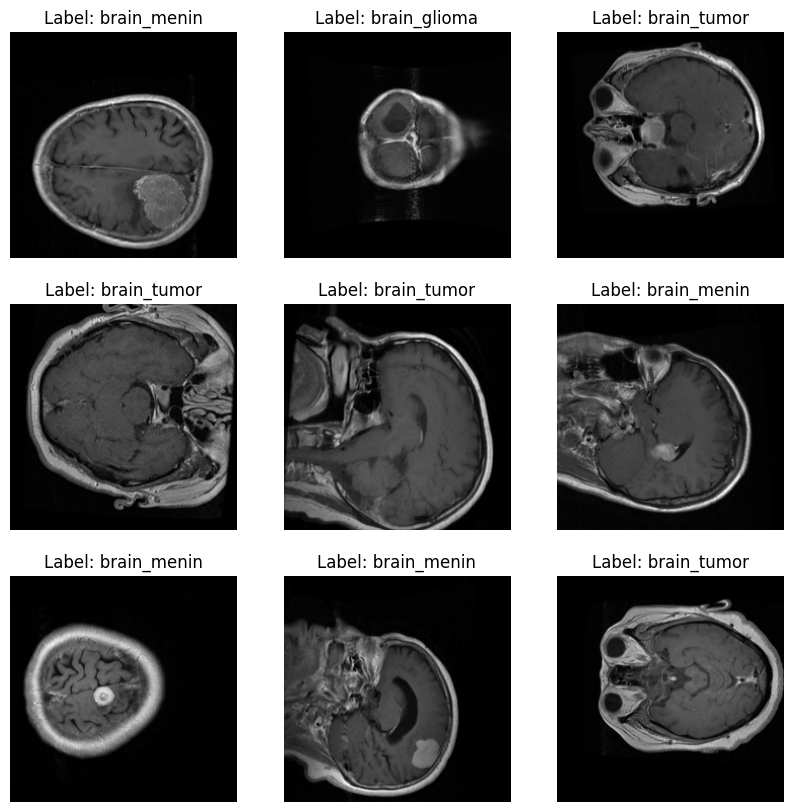

In [4]:
# View a sample of 9 images from the training set

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(ds["train"][i]["image"])
    plt.title(f"Label: {ds['train'][i]['label']}")
    plt.axis("off")
plt.show()

-----


### EDA - Counting occurrences of classes

Comptage par classe : Counter({'brain_menin': 5000, 'brain_glioma': 5000, 'brain_tumor': 5000})


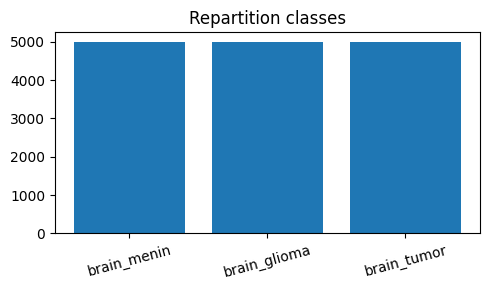

In [5]:
from datasets import DatasetDict
from collections import Counter
import matplotlib.pyplot as plt

# Retrieving the training set
train = ds["train"] if isinstance(ds, DatasetDict) else ds

# Counting occurrences of each class in the training set
counts = Counter(train["label"])  # train["label"] is a list of labels
print("Comptage par classe :", counts)

# Bar plot of class distribution
labels = list(counts.keys())
values = [counts[k] for k in labels]
plt.figure(figsize=(5,3))
plt.bar(labels, values)
plt.title("Repartition classes")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


We can observe that we have an equipartition of each classes and an unbalanced dataset. It will be interresting when we will split into train/test/val samples. 

-----

### Data Split Preparation 

In [ ]:
# Preparing the split of the dataset (Hugging Face Datasets library)
# Using stratified sampling to maintain class distribution in each subset

ds = ds.class_encode_column("label") #Encode the labels to integers 
# First, split into train (80%) and temp (20%)
train_testvalid = ds["train"].train_test_split(test_size=0.2, stratify_by_column='label', seed=42) # Train size = 80%
test_valid = train_testvalid["test"].train_test_split(test_size=0.5, stratify_by_column='label', seed=42) # Validation siez = 10% and test size = 10%

# Creating the new DatasetDict
ds = DatasetDict({
    "train": train_testvalid["train"],
    "validation": test_valid["train"],
    "test": test_valid["test"]
})

In [7]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 12000
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 1500
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1500
    })
})


In [ ]:
# Verification of the class distribution in each subset

for split in ds.keys():
    counts = Counter(ds[split]["label"])
    print(f"Counter per class in {split} split : {counts}")

Counter per class in train split : Counter({2: 4000, 0: 4000, 1: 4000})
Counter per class in validation split : Counter({0: 500, 2: 500, 1: 500})
Counter per class in test split : Counter({2: 500, 0: 500, 1: 500})


Nice equipartition of each class in each subset.

-----

### Save preprocessed dataset

In [11]:
# Saving the preprocessed dataset
ds.save_to_disk("data/brain_cancer_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/12000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1500 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1500 [00:00<?, ? examples/s]